In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

import tensorflow as tf

In [11]:
data_dir = "gesture_data/"

## Data plot

In [6]:
sb.set_palette("husl",3)
sb.set_style("whitegrid")

In [16]:
data = pd.read_csv(data_dir + 'left.csv')
print(data)

       aX    aY    aZ   gX  gY  gZ    yaw  pitch   roll
0    -143   991  8060   -2   1   0   5.91  -1.49  54.78
1    -159   981  8086   -2   0   1   5.89  -1.50  54.77
2    -189   963  8116   -2   0   1   5.88  -1.51  54.74
3    -215   931  8134   -1  -1   2   5.87  -1.50  54.71
4    -229   884  8136    0  -2   2   5.87  -1.49  54.69
...   ...   ...   ...  ...  ..  ..    ...    ...    ...
4945   87 -6398  5474   90 -11  -2 -48.28  -0.42  63.59
4946  181 -6056  5492   83  -6   0 -47.05  -0.32  64.05
4947  229 -5864  5466   81   2   1 -45.89  -0.32  64.52
4948  195 -5837  5531   88   6   3 -44.68  -0.38  65.02
4949   89 -5932  5750  103   1   5 -43.29  -0.47  65.49

[4950 rows x 9 columns]


In [9]:
def plot_csv(file_path, frame_sample=100):
    df = pd.read_csv(file_path)

    index = range(1, len(df['aX']) + 1)

    plt.rcParams["figure.figsize"] = (20, 10)

    # accel Plot
    plt.plot(index, df['aX'], 'g-', label='x', linestyle='solid')
    plt.plot(index, df['aY'], 'b-', label='y', linestyle='solid')
    plt.plot(index, df['aZ'], 'r-', label='z', linestyle='solid')
    plt.title("Acceleration")
    plt.xlabel("Sample #")
    plt.ylabel("Acceleration (G)")
    plt.legend()

    for frame in range(frame_sample, len(df['aX']) + 1, frame_sample):
        plt.axvline(x=frame, color='gray', linestyle='--', linewidth=0.8)

    plt.show()

    # gyro plot
    plt.plot(index, df['gX'], 'g-', label='x', linestyle='solid')
    plt.plot(index, df['gY'], 'b-', label='y', linestyle='solid')
    plt.plot(index, df['gZ'], 'r-', label='z', linestyle='solid')
    plt.title("Gyroscope")
    plt.xlabel("Sample #")
    plt.ylabel("Gyroscope (deg/sec)")
    plt.legend()

    for frame in range(frame_sample, len(df['gX']) + 1, frame_sample):
        plt.axvline(x=frame, color='gray', linestyle='--', linewidth=0.8)

    plt.show()

    # gyro plot
    plt.plot(index, df['roll'], 'g-', label='roll', linestyle='solid')
    plt.plot(index, df['pitch'], 'b-', label='pitch', linestyle='solid')
    plt.plot(index, df['yaw'], 'r-', label='yaw', linestyle='solid')
    plt.title("Euler Angle")
    plt.xlabel("Sample #")
    plt.ylabel("Angle (deg)")
    plt.legend()

    for frame in range(frame_sample, len(df['gX']) + 1, frame_sample):
        plt.axvline(x=frame, color='gray', linestyle='--', linewidth=0.8)

    plt.show()

/tmp/ipykernel_47920/1590565615.py:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(index, df['aX'], 'g-', label='x', linestyle='solid')
/tmp/ipykernel_47920/1590565615.py:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(index, df['aY'], 'b-', label='y', linestyle='solid')
/tmp/ipykernel_47920/1590565615.py:11: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(index, df['aZ'], 'r-', label='z', linestyle='solid')


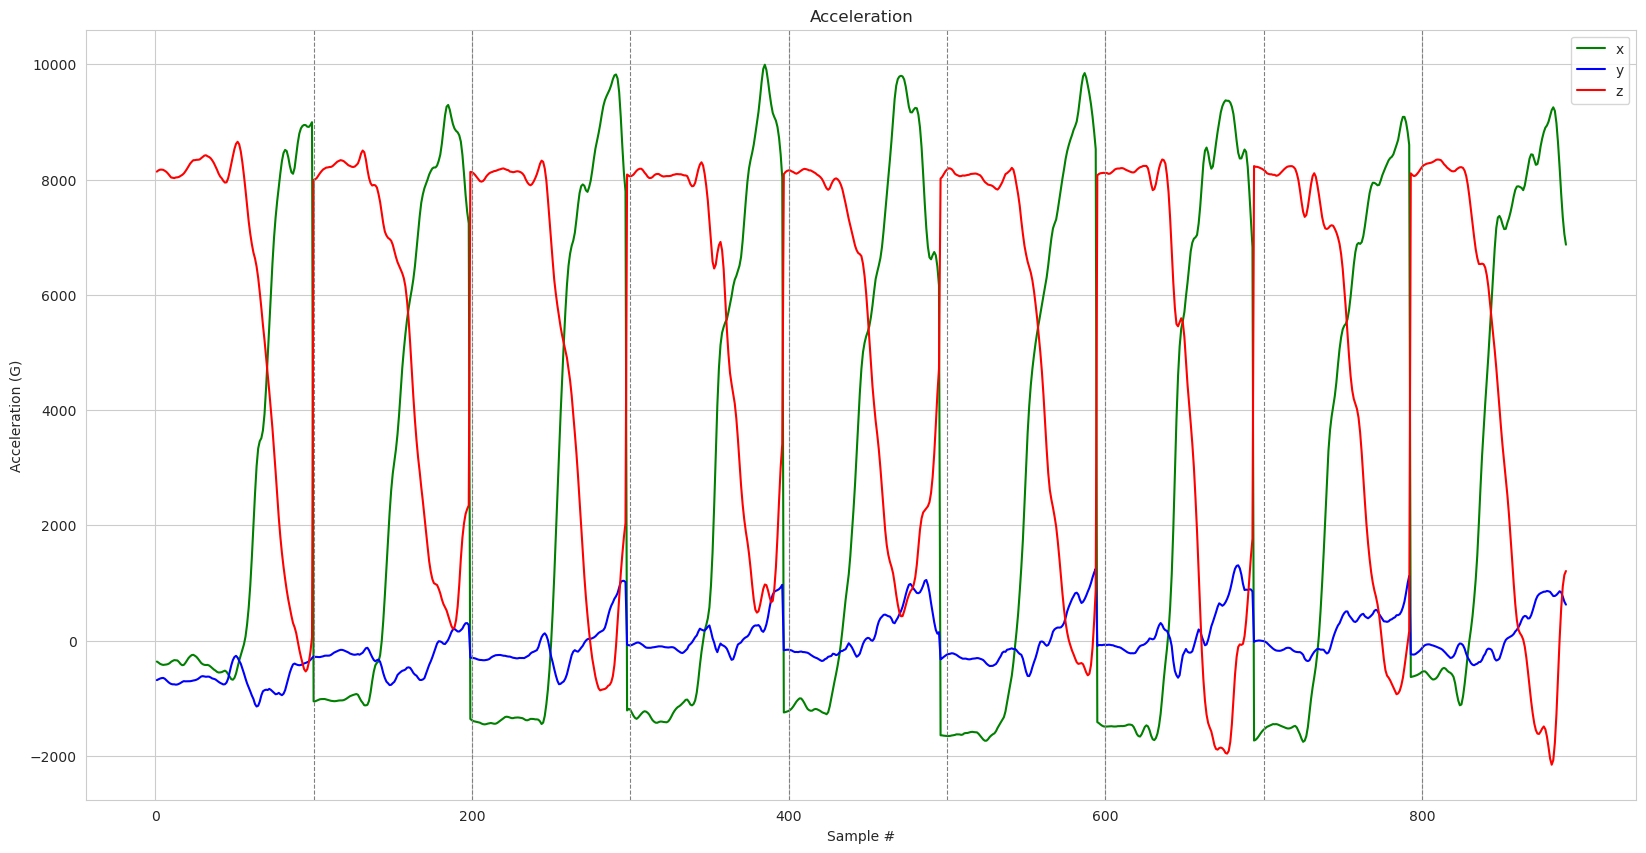

/tmp/ipykernel_47920/1590565615.py:23: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(index, df['gX'], 'g-', label='x', linestyle='solid')
/tmp/ipykernel_47920/1590565615.py:24: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(index, df['gY'], 'b-', label='y', linestyle='solid')
/tmp/ipykernel_47920/1590565615.py:25: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(index, df['gZ'], 'r-', label='z', linestyle='solid')


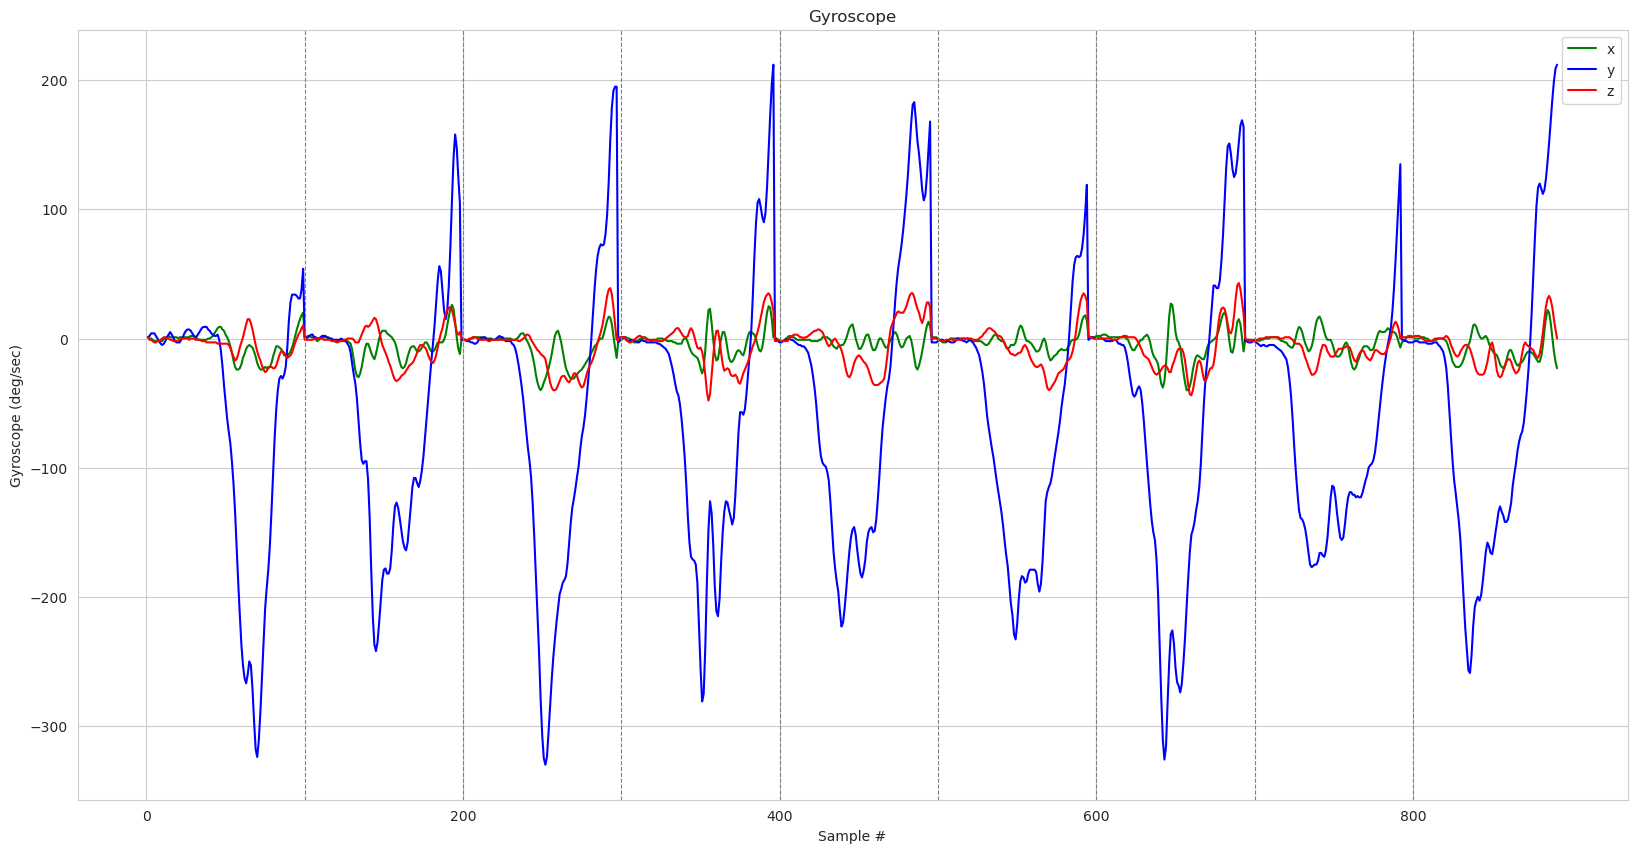

/tmp/ipykernel_47920/1590565615.py:37: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(index, df['roll'], 'g-', label='roll', linestyle='solid')
/tmp/ipykernel_47920/1590565615.py:38: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(index, df['pitch'], 'b-', label='pitch', linestyle='solid')
/tmp/ipykernel_47920/1590565615.py:39: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(index, df['yaw'], 'r-', label='yaw', linestyle='solid')


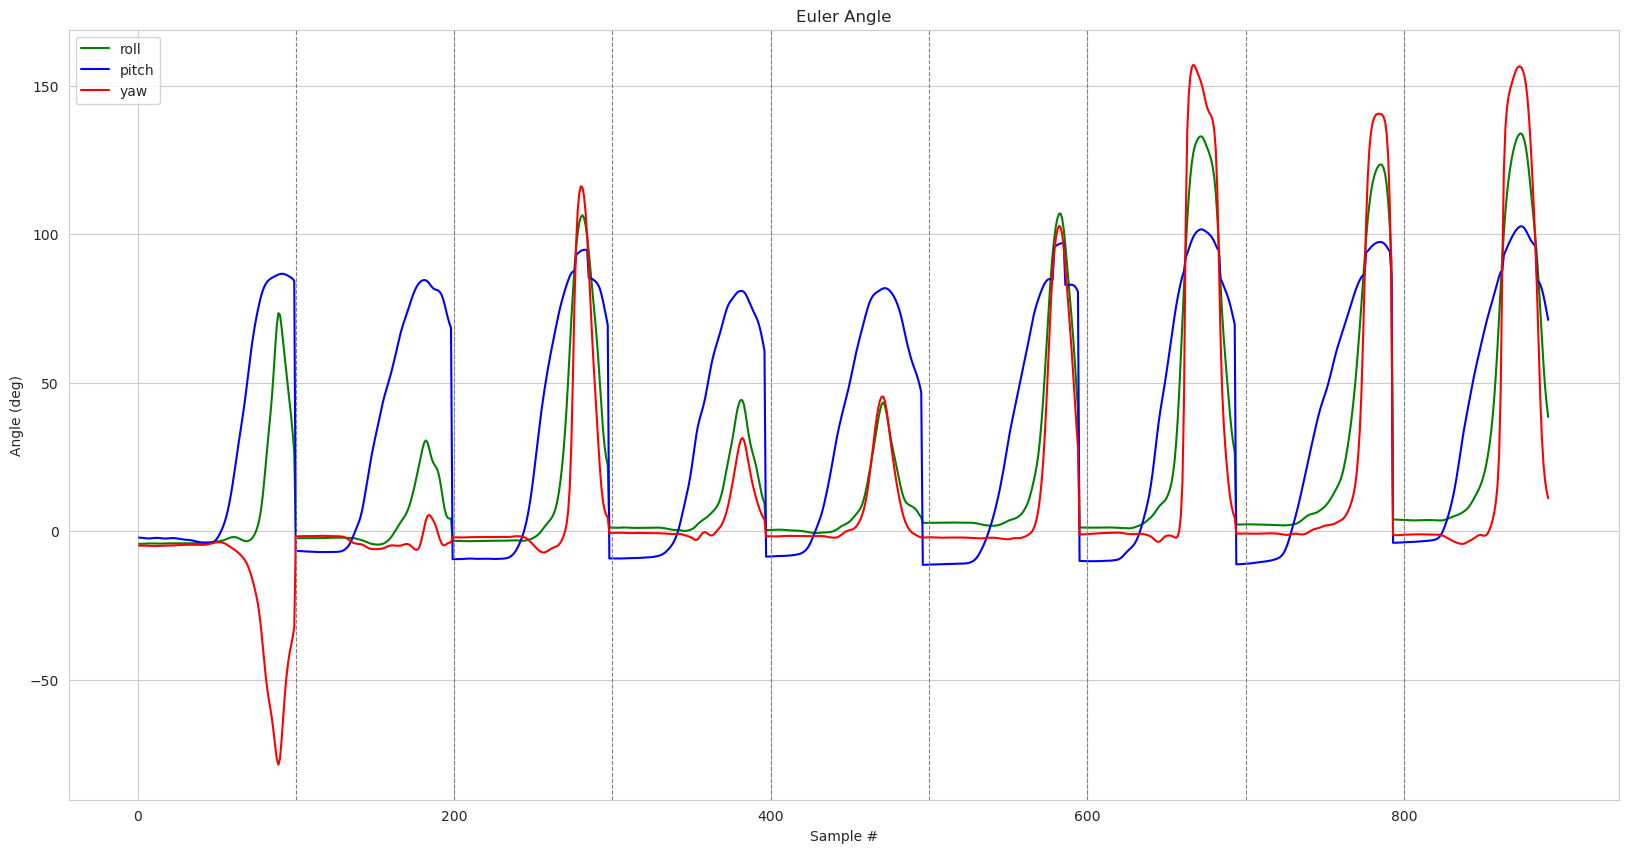

In [12]:
plot_csv(data_dir+'forward.csv')
#ensure that all gesture movement inside the frame!
#if not, slide it

#update the csv

Number of samples: 4950


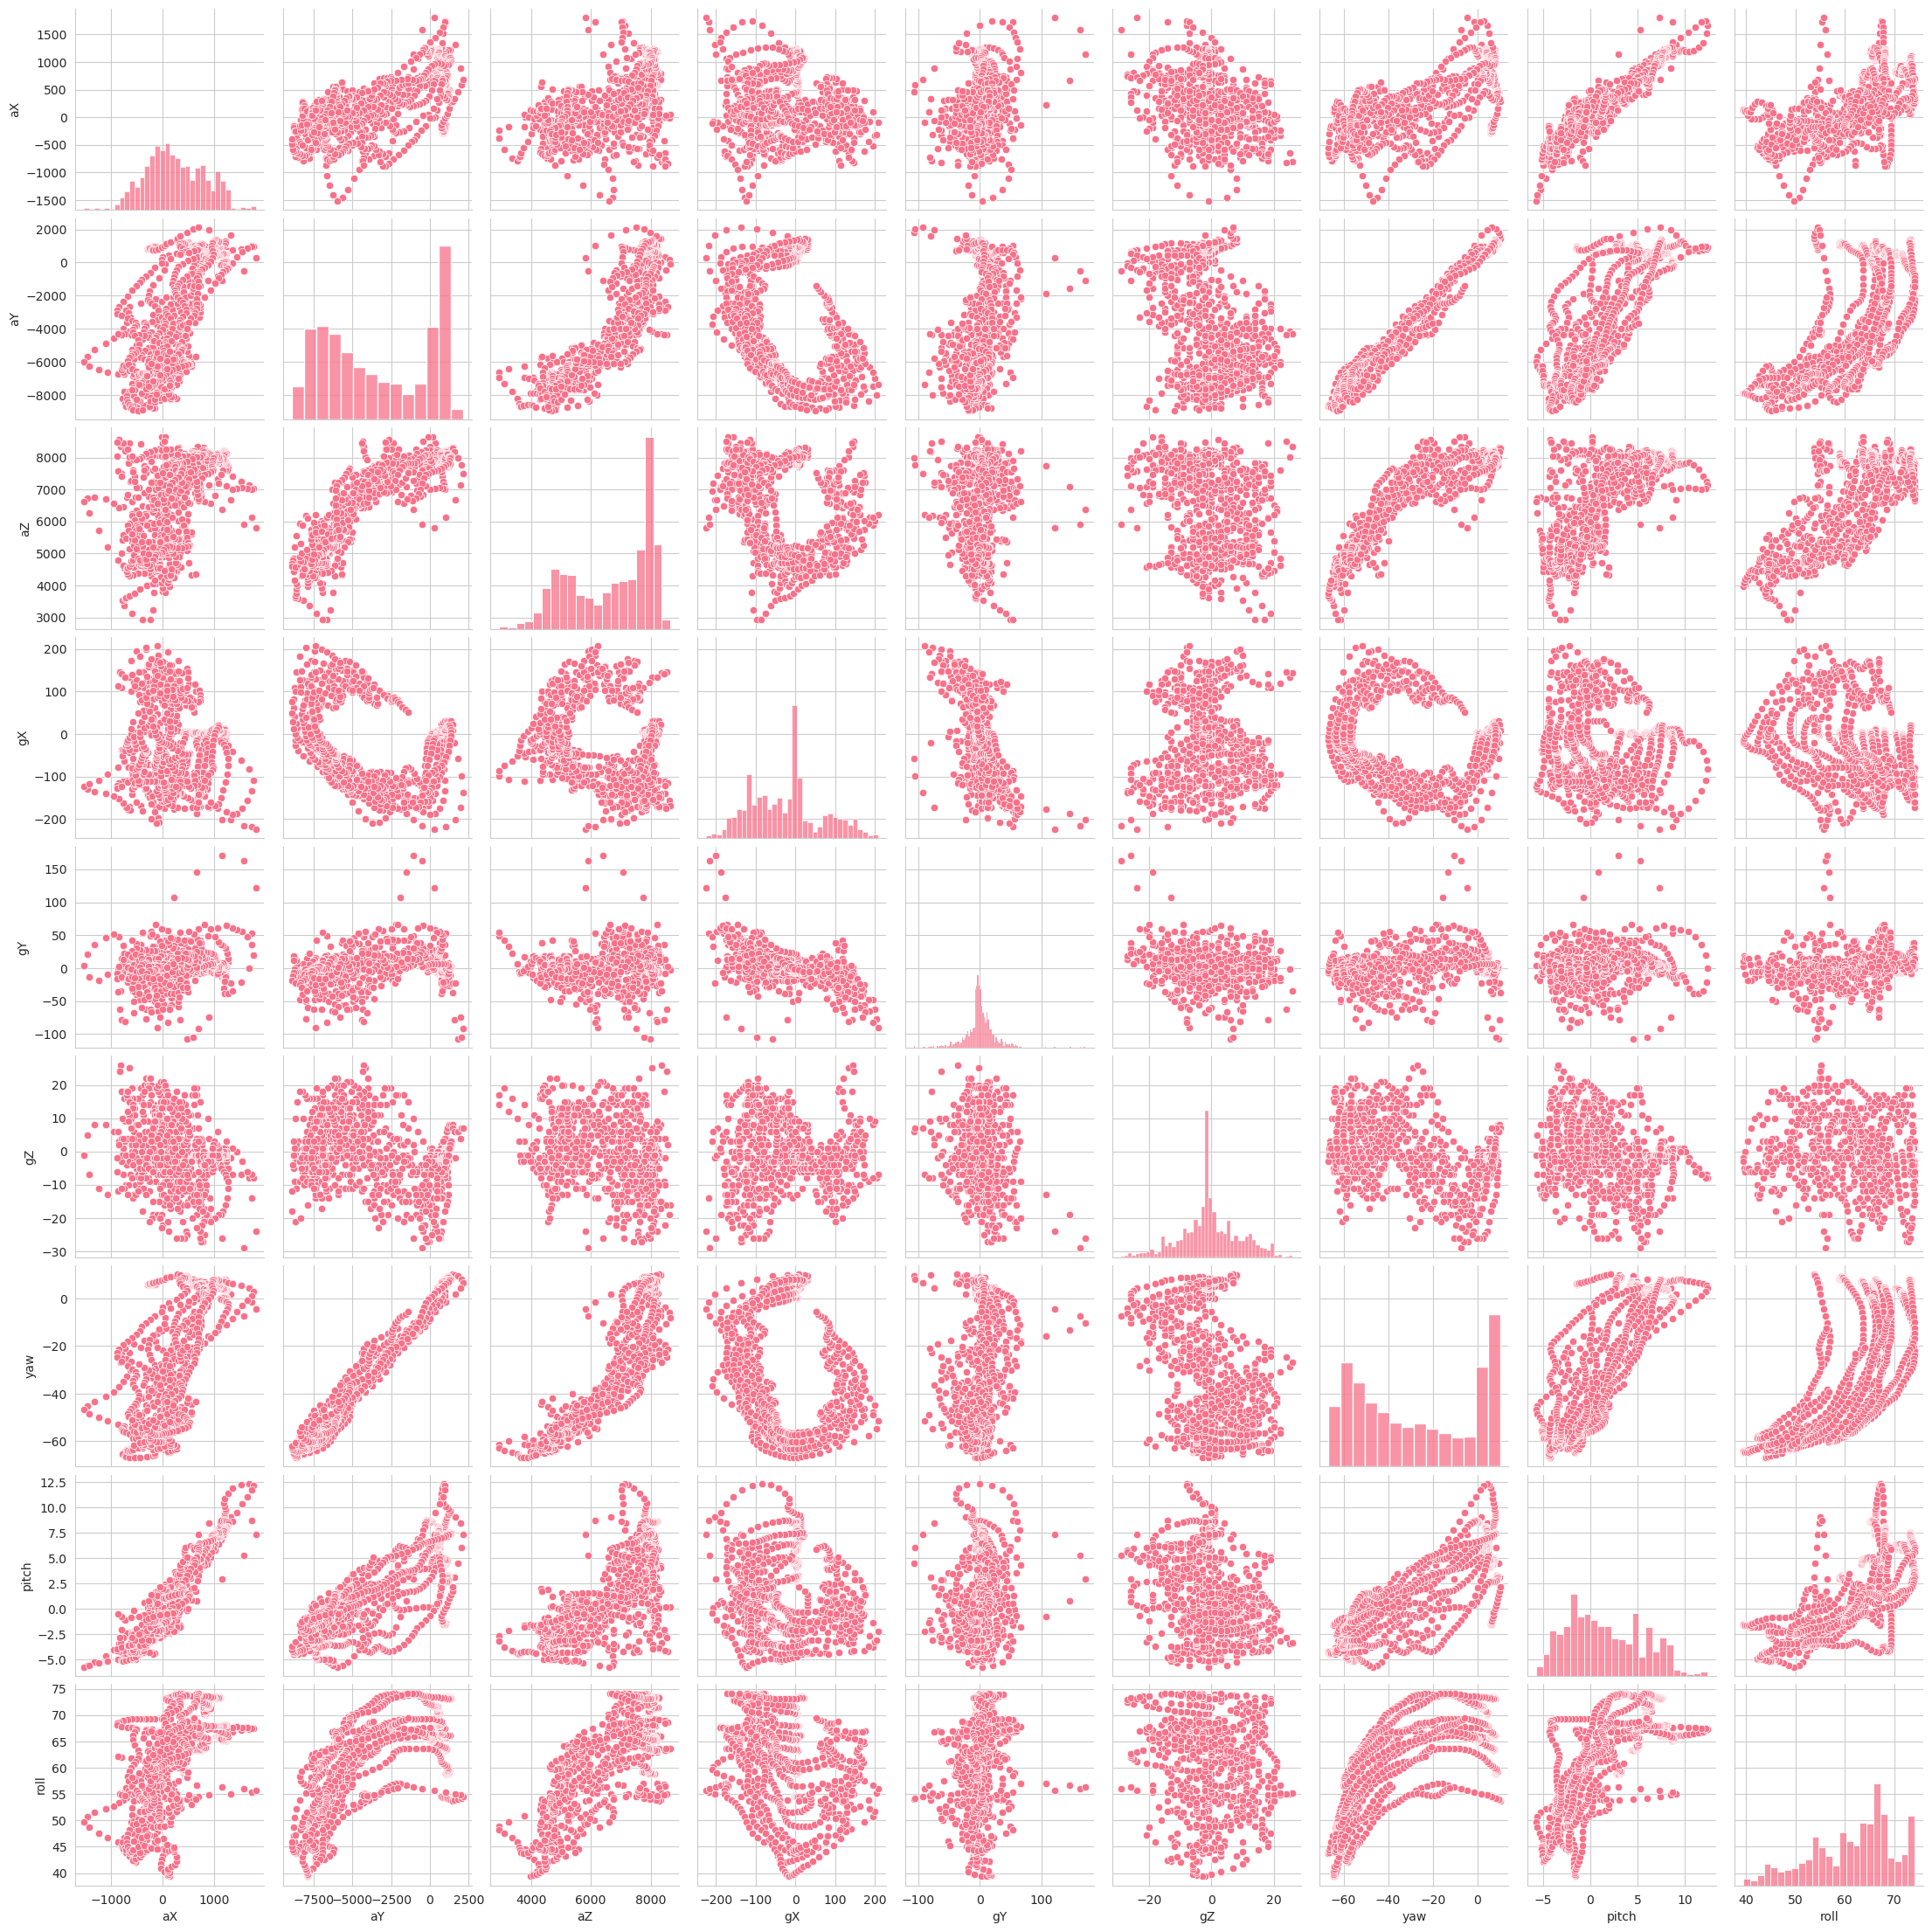

In [14]:
left = pd.read_csv(data_dir + "left.csv")
print ('Number of samples: '+ str(len(left)))
left_pairplot = sb.pairplot(left)

/tmp/ipykernel_47920/1590565615.py:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(index, df['aX'], 'g-', label='x', linestyle='solid')
/tmp/ipykernel_47920/1590565615.py:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(index, df['aY'], 'b-', label='y', linestyle='solid')
/tmp/ipykernel_47920/1590565615.py:11: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(index, df['aZ'], 'r-', label='z', linestyle='solid')


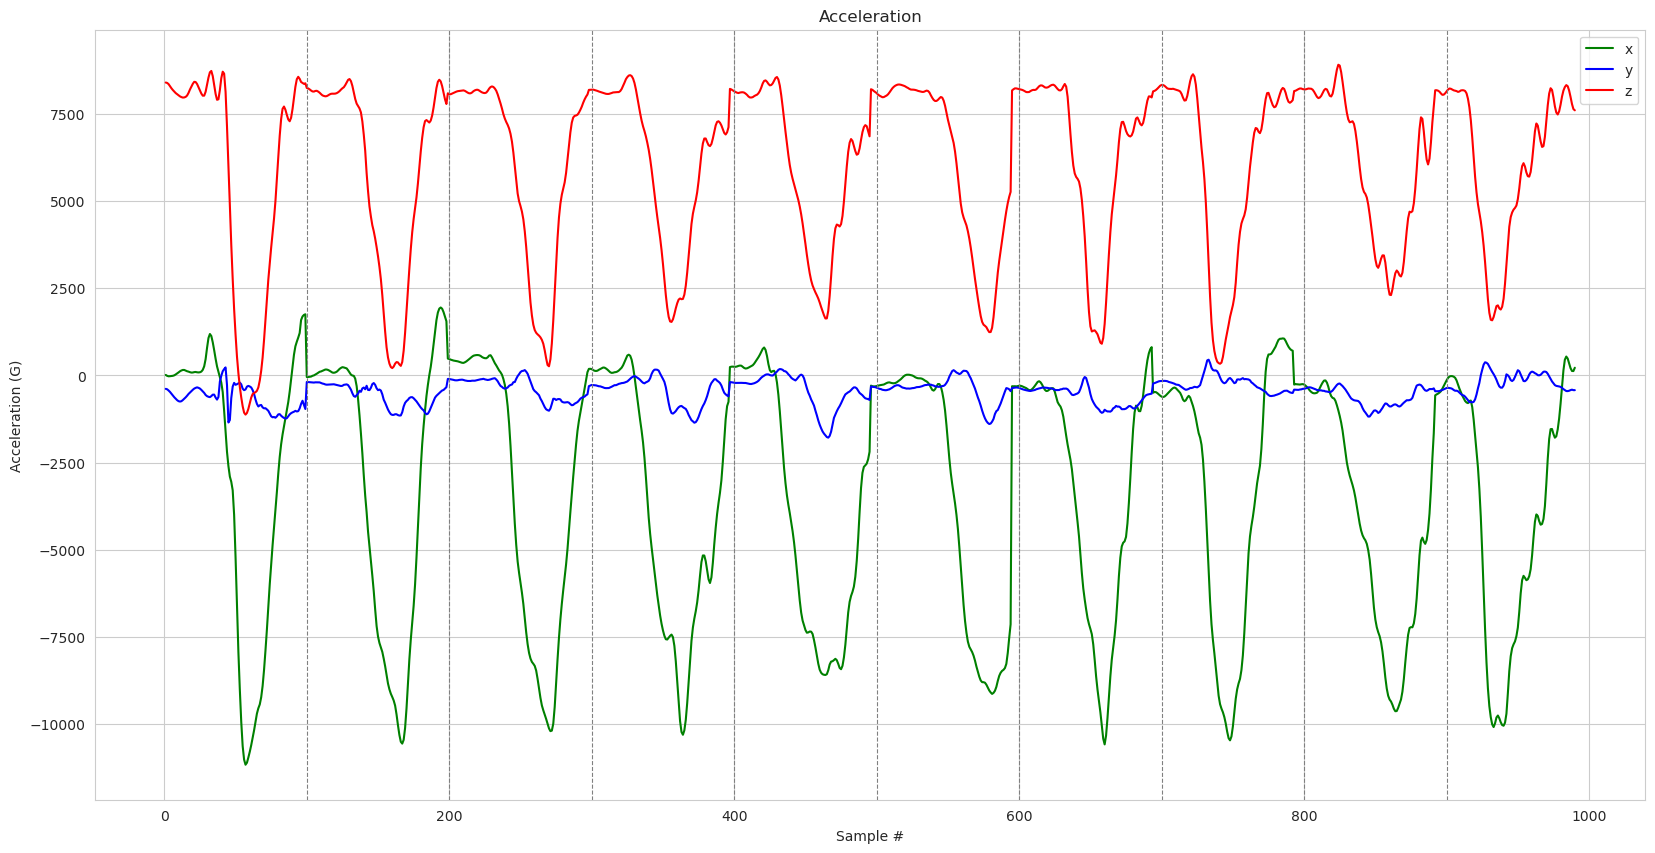

/tmp/ipykernel_47920/1590565615.py:23: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(index, df['gX'], 'g-', label='x', linestyle='solid')
/tmp/ipykernel_47920/1590565615.py:24: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(index, df['gY'], 'b-', label='y', linestyle='solid')
/tmp/ipykernel_47920/1590565615.py:25: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(index, df['gZ'], 'r-', label='z', linestyle='solid')


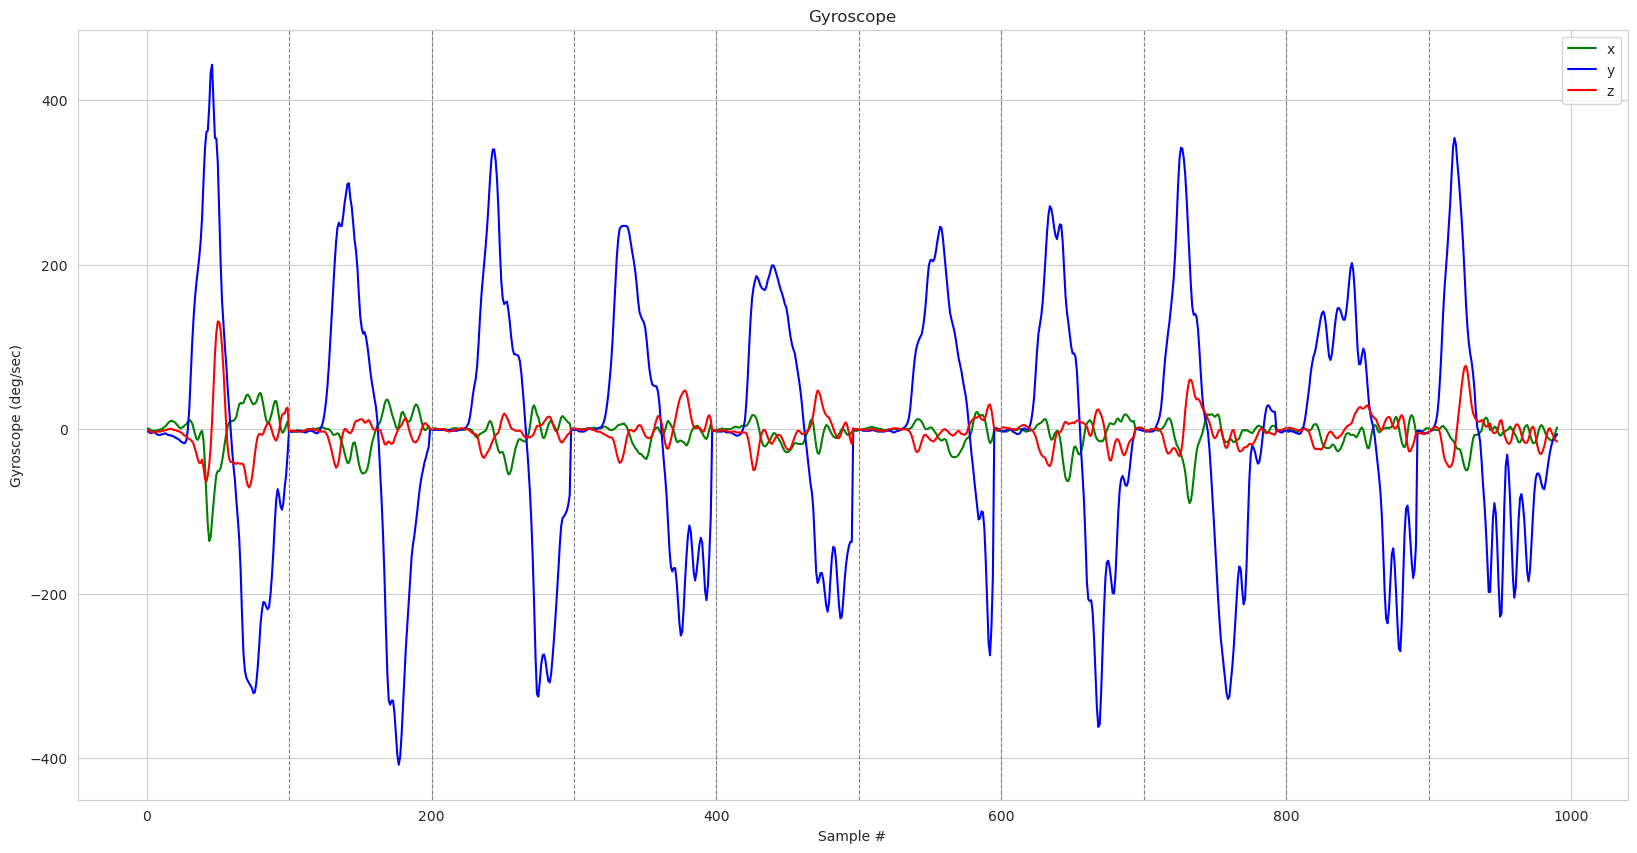

/tmp/ipykernel_47920/1590565615.py:37: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(index, df['roll'], 'g-', label='roll', linestyle='solid')
/tmp/ipykernel_47920/1590565615.py:38: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(index, df['pitch'], 'b-', label='pitch', linestyle='solid')
/tmp/ipykernel_47920/1590565615.py:39: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(index, df['yaw'], 'r-', label='yaw', linestyle='solid')


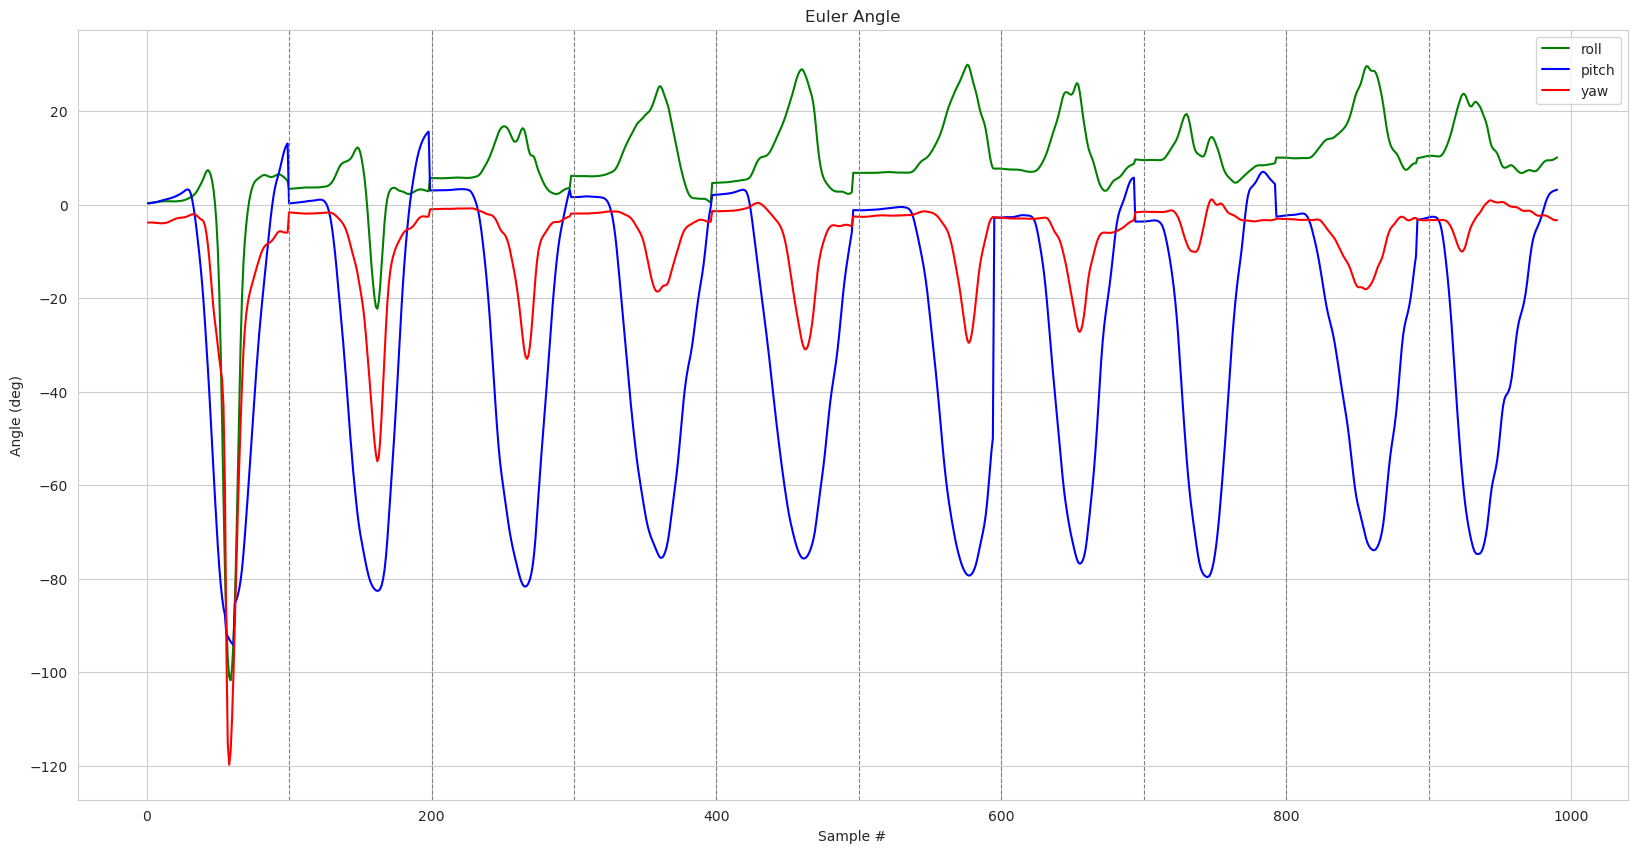

In [15]:
plot_csv(data_dir + 'backward.csv', 100)

## Data2

In [17]:
df = pd.read_csv(data_dir + 'left.csv')
min_values = df.min()
max_values = df.max()

print(f"Min Values: \n{min_values} \nMax Values: \n{max_values}")

Min Values: 
aX      -1517.00
aY      -8936.00
aZ       2929.00
gX       -224.00
gY       -107.00
gZ        -29.00
yaw       -66.77
pitch      -5.74
roll       39.39
dtype: float64 
Max Values: 
aX       1800.00
aY       2135.00
aZ       8654.00
gX        207.00
gY        171.00
gZ         26.00
yaw        10.13
pitch      12.37
roll       74.19
dtype: float64


Graph index 0 for file 'left'.


/tmp/ipykernel_47920/2387629595.py:28: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(index, df['aX'], 'g-', label='x', linestyle='solid')
/tmp/ipykernel_47920/2387629595.py:29: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(index, df['aY'], 'b-', label='y', linestyle='solid')
/tmp/ipykernel_47920/2387629595.py:30: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(index, df['aZ'], 'r-', label='z', linestyle='solid')
/tmp/ipykernel_47920/2387629595.py:40: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-" (-> linestyle='-'). The keyword argumen

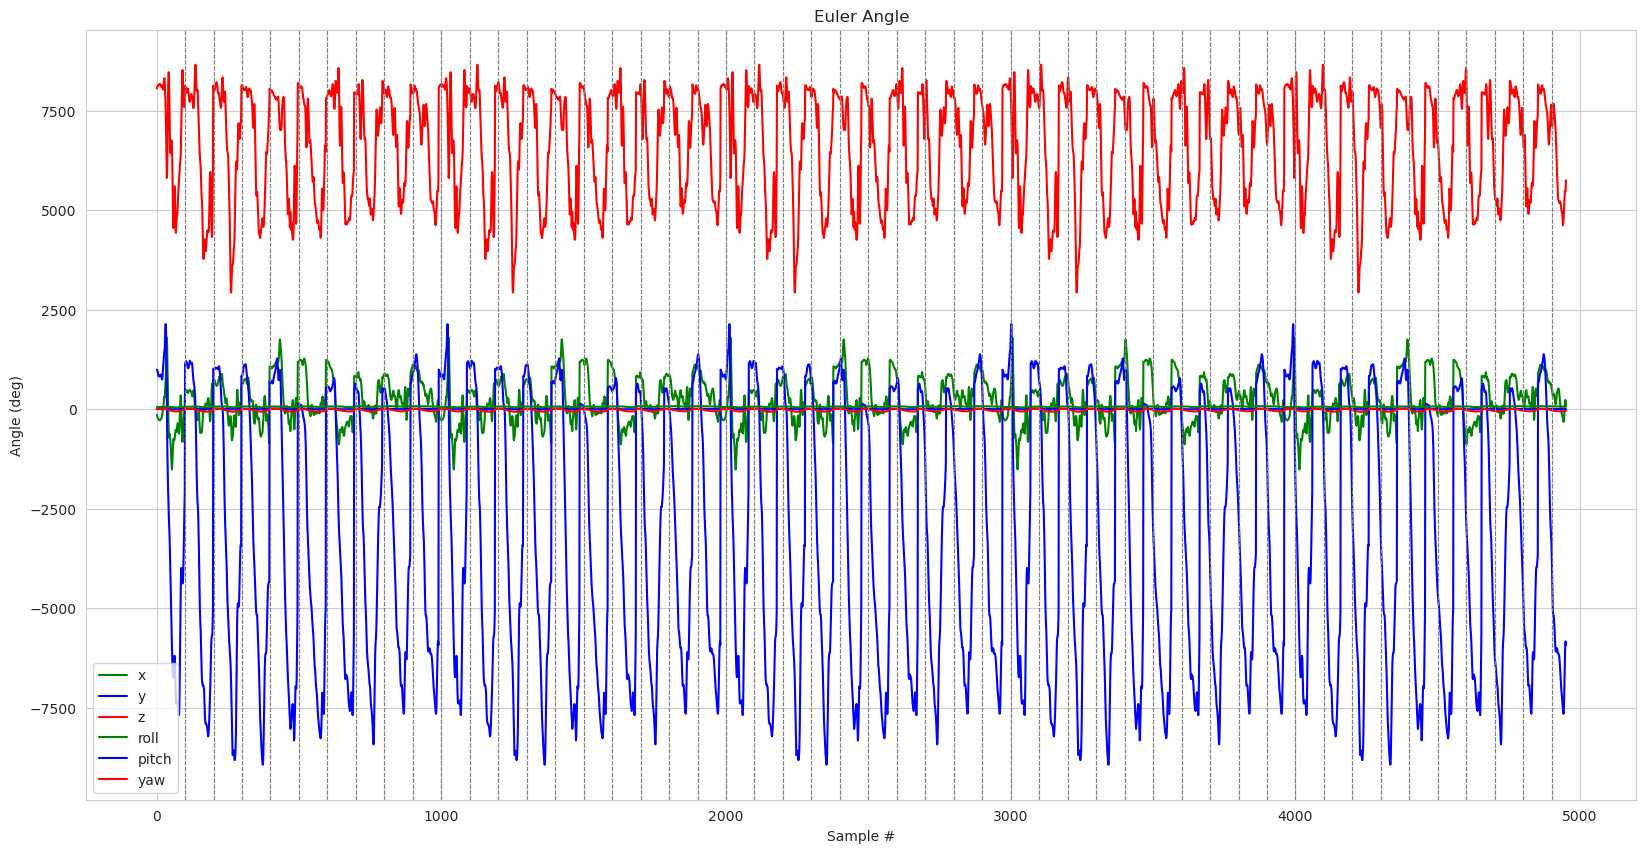

Graph index 1 for file 'right'.


/tmp/ipykernel_47920/2387629595.py:28: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(index, df['aX'], 'g-', label='x', linestyle='solid')
/tmp/ipykernel_47920/2387629595.py:29: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(index, df['aY'], 'b-', label='y', linestyle='solid')
/tmp/ipykernel_47920/2387629595.py:30: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(index, df['aZ'], 'r-', label='z', linestyle='solid')
/tmp/ipykernel_47920/2387629595.py:40: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-" (-> linestyle='-'). The keyword argumen

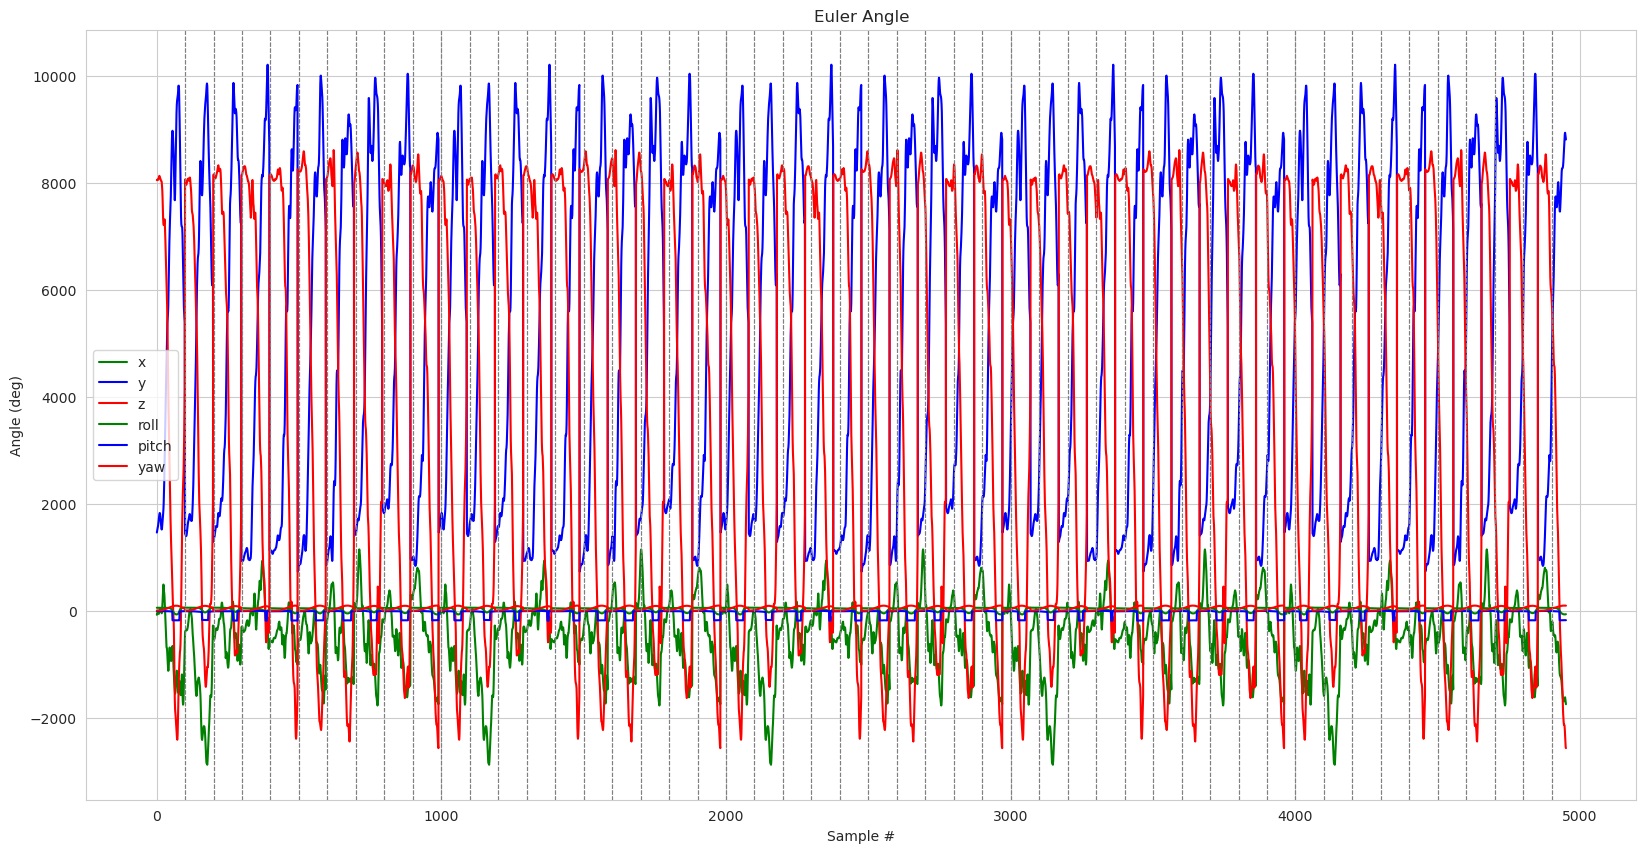

In [18]:
GESTURES = [
    # "forward",
    # "backward",
    # "back",
    # "punch",
    # "flex",
    "left",
    "right",
]

NUM_GESTURES = len(GESTURES)
SAMPLES_PER_GESTURE = 100

NUM_GESTURES = len(GESTURES)

# read each csv file 
for gesture_index in range(NUM_GESTURES):
    gesture = GESTURES[gesture_index]
    
    print(f"Graph index {gesture_index} for file '{gesture}'.")
    
    df = pd.read_csv(data_dir + gesture + ".csv")
    index = range(1, len(df['aX']) + 1)

    plt.rcParams["figure.figsize"] = (20, 10)

    # accel Plot
    plt.plot(index, df['aX'], 'g-', label='x', linestyle='solid')
    plt.plot(index, df['aY'], 'b-', label='y', linestyle='solid')
    plt.plot(index, df['aZ'], 'r-', label='z', linestyle='solid')
    plt.title("Acceleration")
    plt.xlabel("Sample #")
    plt.ylabel("Acceleration (G)")
    plt.legend()

    for frame in range(SAMPLES_PER_GESTURE, len(df['aX']) + 1, SAMPLES_PER_GESTURE):
        plt.axvline(x=frame, color='gray', linestyle='--', linewidth=0.8)

    # gyro plot
    plt.plot(index, df['roll'], 'g-', label='roll', linestyle='solid')
    plt.plot(index, df['pitch'], 'b-', label='pitch', linestyle='solid')
    plt.plot(index, df['yaw'], 'r-', label='yaw', linestyle='solid')
    plt.title("Euler Angle")
    plt.xlabel("Sample #")
    plt.ylabel("Angle (deg)")
    plt.legend()

    for frame in range(SAMPLES_PER_GESTURE, len(df['gX']) + 1, SAMPLES_PER_GESTURE):
        plt.axvline(x=frame, color='gray', linestyle='--', linewidth=0.8)

    plt.show()


In [21]:
print(f"TensorFlow version = {tf.__version__}\n")

SEED = 1945
np.random.seed(SEED)
tf.random.set_seed(SEED)

TensorFlow version = 2.12.0



In [20]:
# create a one-hot encoded matrix that is used in the output
# One hot encoding is a process by which categorical variables are converted into a 
# form that could be provided to ML algorithms to do a better job in prediction.
# A one hot encoding is a representation of categorical variables as binary vectors.
# This first requires that the categorical values be mapped to integer values.
# Then, each integer value is represented as a binary vector that is all zero 
# values except the index of the integer, which is marked with a 1.

ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

# The eye() method of Python numpy class returns a 2-D array with ones on the diagonal 
# and zeros elsewhere.

inputs = []
outputs = []

# read each csv file and push an input and output
for gesture_index in range(NUM_GESTURES):
    gesture = GESTURES[gesture_index]
    print(f"Processing index {gesture_index} for gesture '{gesture}'.")
    
    output = ONE_HOT_ENCODED_GESTURES[gesture_index]
    
    df = pd.read_csv(data_dir + gesture + ".csv")
    
    # calculate the number of gesture recordings in the file
    num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)
    
    print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")
    
    for i in range(num_recordings):
        tensor = []
        for j in range(SAMPLES_PER_GESTURE):
            index = i * SAMPLES_PER_GESTURE + j
            # normalize the input data, between 0 to 1:
            # - acceleration is 2g, ± 16384
            # - gyroscope is between: ± 250 (deg / sec)
            # more on datasheet /invensense mpu6050
            
            tensor += [
                (df['aX'][index] + 16384) / 32768,
                (df['aY'][index] + 16384) / 32768,
                (df['aZ'][index] + 16384) / 32768,
                (df['gX'][index] + 250) / 500,
                (df['gY'][index] + 250) / 500,
                (df['gZ'][index] + 250) / 500
            ]
        inputs.append(tensor)
        outputs.append(output)

# convert the list to numpy array
# A numpy array is a grid of values, all of the same type, and is indexed by a 
# tuple of nonnegative integers. The number of dimensions is the rank of the array; 
# the shape of an array is a tuple of integers giving the size of the array along 
# each dimension.

inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")

Processing index 0 for gesture 'left'.
	There are 49 recordings of the left gesture.
Processing index 1 for gesture 'right'.
	There are 49 recordings of the right gesture.
Data set parsing and preparation complete.


In [22]:
# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
# https://stackoverflow.com/a/37710486/2020087
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


## Model_Dev

In [23]:
# build the model and train it
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae', 'accuracy'])
history = model.fit(inputs_train, outputs_train, epochs=20, batch_size=1, validation_data=(inputs_validate, outputs_validate))

2024-01-26 12:36:21.318564: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/20
58/58 [==============================] - 3s 14ms/step - loss: 0.2753 - mae: 0.4703 - accuracy: 0.6207 - val_loss: 0.1524 - val_mae: 0.3888 - val_accuracy: 1.0000
Epoch 2/20
58/58 [==============================] - 0s 8ms/step - loss: 0.1262 - mae: 0.3322 - accuracy: 0.9310 - val_loss: 0.0536 - val_mae: 0.2277 - val_accuracy: 1.0000
Epoch 3/20
58/58 [==============================] - 0s 7ms/step - loss: 0.0542 - mae: 0.2008 - accuracy: 0.9655 - val_loss: 0.0331 - val_mae: 0.1588 - val_accuracy: 1.0000
Epoch 4/20
58/58 [==============================] - 0s 8ms/step - loss: 0.0317 - mae: 0.1360 - accuracy: 0.9655 - val_loss: 0.0069 - val_mae: 0.0761 - val_accuracy: 1.0000
Epoch 5/20
58/58 [==============================] - 0s 8ms/step - loss: 0.0087 - mae: 0.0702 - accuracy: 1.0000 - val_loss: 0.0058 - val_mae: 0.0578 - val_accuracy: 1.0000
Epoch 6/20
58/58 [==============================] - 0s 7ms/step - loss: 0.0122 - mae: 0.0585 - accuracy: 0.9828 - val_loss: 0.0011 - val_ma

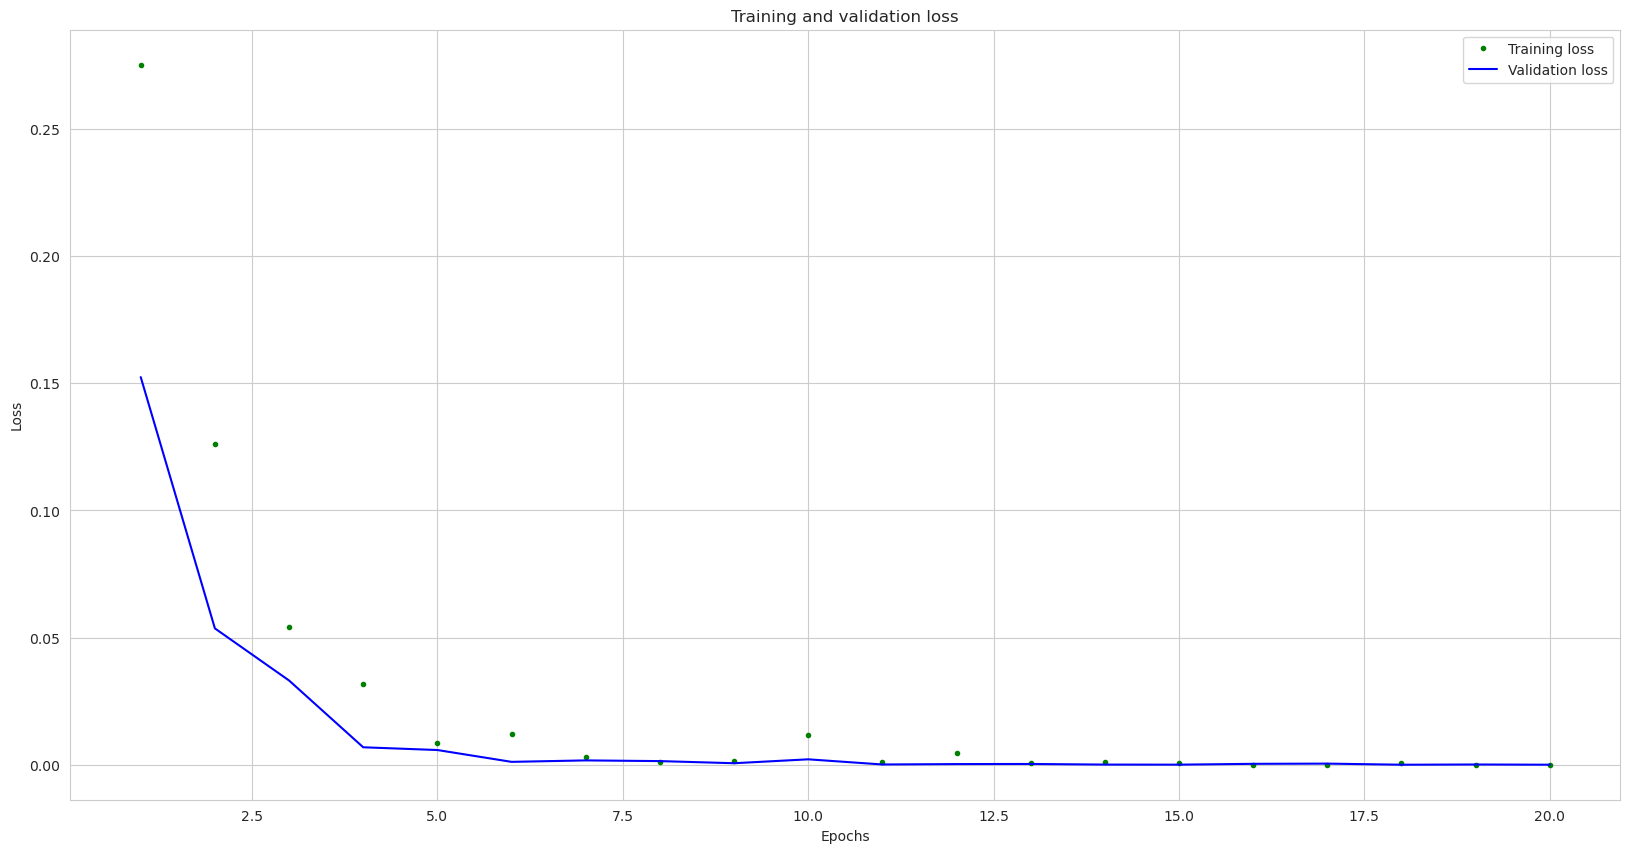

[20.0, 10.0]


In [24]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

1/1 [==============================] - 0s 84ms/step
predictions =
 [[0.997 0.003]
 [0.002 0.998]
 [0.002 0.998]
 [0.002 0.998]
 [0.002 0.998]
 [0.002 0.998]
 [0.005 0.995]
 [0.002 0.998]
 [0.998 0.002]
 [0.999 0.001]
 [0.999 0.001]
 [0.002 0.998]
 [0.999 0.001]
 [0.999 0.001]
 [0.999 0.001]
 [0.002 0.998]
 [0.999 0.001]
 [0.002 0.998]
 [0.999 0.001]]
actual =
 [[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


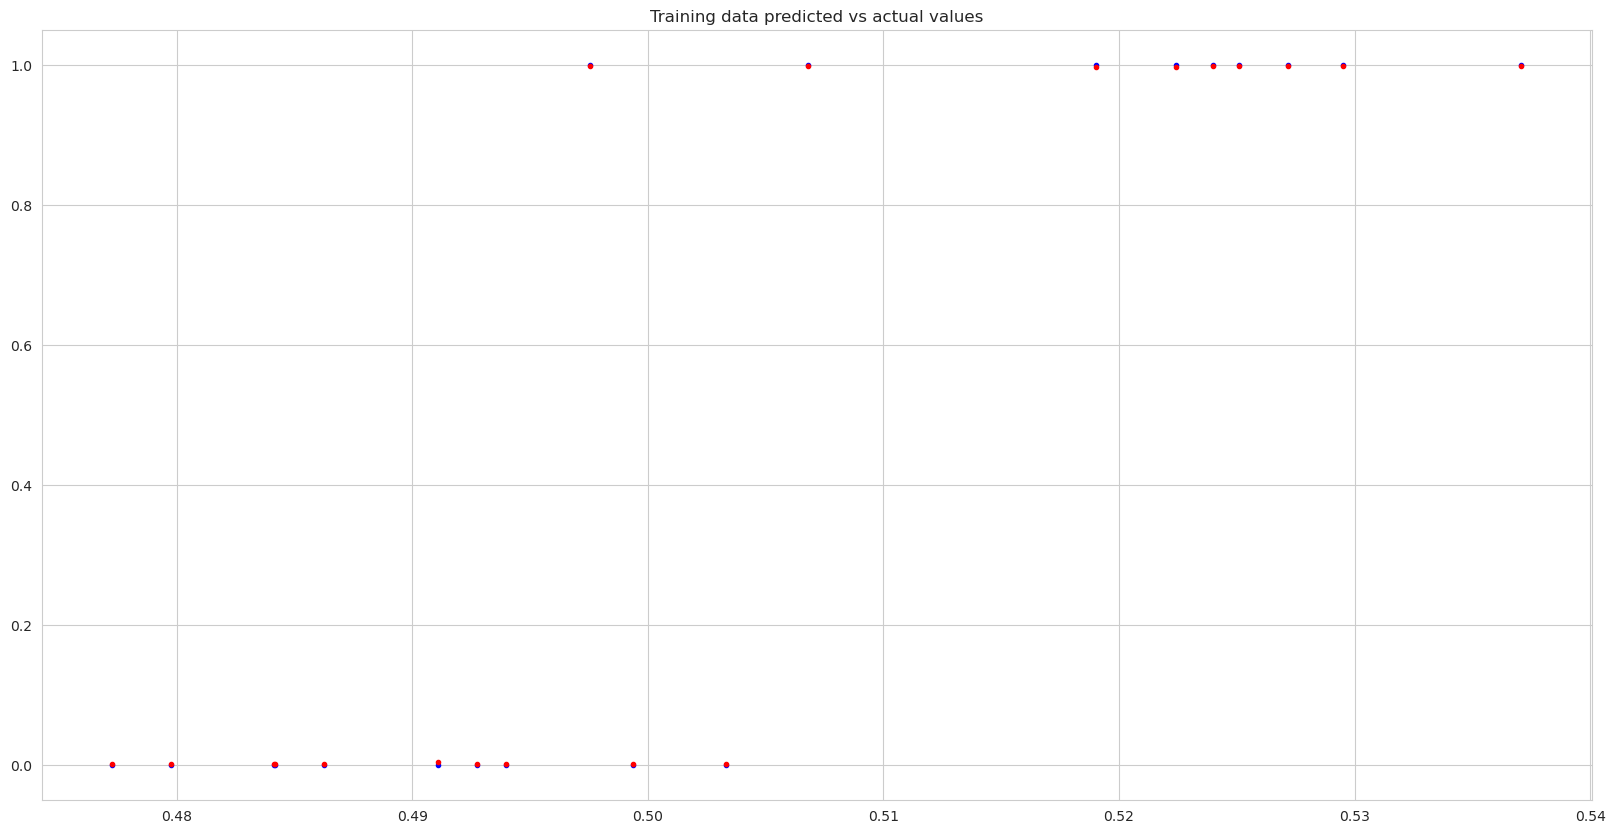

In [25]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected outputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

# Plot the predictions along with the test data
plt.clf()
plt.title('Training data predicted vs actual values')

# Assuming you want to plot the first column of inputs_test and outputs_test
plt.plot(inputs_test[:, 0], outputs_test[:, 0], 'b.', label='Actual')
plt.plot(inputs_test[:, 0], predictions[:, 0], 'r.', label='Predicted')

plt.show()


## Model Output

In [26]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)

INFO:tensorflow:Assets written to: /tmp/tmpp5hdi_5g/assets


INFO:tensorflow:Assets written to: /tmp/tmpp5hdi_5g/assets


Model is 125480 bytes


2024-01-26 12:37:10.029450: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-01-26 12:37:10.029534: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-01-26 12:37:10.042486: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpp5hdi_5g
2024-01-26 12:37:10.046357: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2024-01-26 12:37:10.046413: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpp5hdi_5g
2024-01-26 12:37:10.062121: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2024-01-26 12:37:10.069646: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2024-01-26 12:37:10.072475: I tensorflow/cc/save

In [27]:
import os
try:
    os.remove("gesture_model.txt")
    print("old Text File Removed!")
except:
    print("File Error!")

old Text File Removed!


In [28]:
try:
    input = open("gesture_model.tflite", "br") 
    output = open("gesture_model.txt","a") 

    model = input.read()
    print(model)

    laenge = len(model)
    print("File length:",laenge)
    counter = 0
except:
    print("File open Error!")

b'\x1c\x00\x00\x00TFL3\x14\x00 \x00\x1c\x00\x18\x00\x14\x00\x10\x00\x0c\x00\x00\x00\x08\x00\x04\x00\x14\x00\x00\x00\x1c\x00\x00\x00\x90\x00\x00\x00\xe8\x00\x00\x00\xf8\xe3\x01\x00\x08\xe4\x01\x00\xc4\xe9\x01\x00\x03\x00\x00\x00\x01\x00\x00\x00\x10\x00\x00\x00\x00\x00\n\x00\x10\x00\x0c\x00\x08\x00\x04\x00\n\x00\x00\x00\x0c\x00\x00\x00\x1c\x00\x00\x008\x00\x00\x00\x0f\x00\x00\x00serving_default\x00\x01\x00\x00\x00\x04\x00\x00\x00\x98\xff\xff\xff\n\x00\x00\x00\x04\x00\x00\x00\x07\x00\x00\x00dense_2\x00\x01\x00\x00\x00\x04\x00\x00\x00\xea\x1b\xfe\xff\x04\x00\x00\x00\x0b\x00\x00\x00dense_input\x00\x02\x00\x00\x004\x00\x00\x00\x04\x00\x00\x00\xdc\xff\xff\xff\r\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00CONVERSION_METADATA\x00\x08\x00\x0c\x00\x08\x00\x04\x00\x08\x00\x00\x00\x0c\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00min_runtime_version\x00\x0e\x00\x00\x00\x0c\xe3\x01\x00\x04\xe3\x01\x00\xb8\xe2\x01\x00\xa0\xe2\x01\x00\xc8\xe1\x01\x00\xf8\x0c\x00\x000\x01\x00\x00\xa8\x00\x00\x00\xa0\x00\x0

In [29]:
counter = 0

while counter < laenge:
    #print ("count",counter)
    out = (hex(model[counter]))
    
    #print (out)
    output.write(out)
    if counter < laenge - 1:
        out =   ','
        output.write(out)
    counter = counter + 1

In [30]:
!echo "const unsigned char model[] = {" > model.h
!cat gesture_model.tflite | xxd -i      >> model.h
!echo "};"                              >> model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")

Header file, model.h, is 773,828 bytes.


## LSTM + 2D CNN
updated soon!

In [32]:
samples = len(train_set['acceleration'][0])

lstm_model = tf.keras.Sequential([
      tf.keras.layers.Bidirectional(
          tf.keras.layers.LSTM(22),
          input_shape=(samples, 3)),  # output_shape=(batch, 253)
      tf.keras.layers.Dense(5, activation="sigmoid")  # (batch, 5)
])

cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (4, 3),padding="same",activation="relu",
                           input_shape=(samples, 3, 1)),  # output_shape=(batch, 760, 3, 8)
    tf.keras.layers.MaxPool2D((3, 3)),  # (batch, 253, 1, 8)
    tf.keras.layers.Dropout(0.1),  # (batch, 253, 1, 8)
    tf.keras.layers.Conv2D(16, (4, 1), padding="same",activation="relu"), # (batch, 253, 1, 16)
    tf.keras.layers.MaxPool2D((3, 1), padding="same"),  # (batch, 84, 1, 16)
    tf.keras.layers.Dropout(0.1),  # (batch, 84, 1, 16)
    tf.keras.layers.Flatten(),  # (batch, 1344)
    tf.keras.layers.Dense(16, activation="relu"),  # (batch, 16)
    tf.keras.layers.Dropout(0.1),  # (batch, 16)
    tf.keras.layers.Dense(5, activation="softmax")  # (batch, 4)
])

cnn_model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (4, 3),padding="same",activation="relu",
                           input_shape=(samples, 3, 1)),  # output_shape=(batch, 760, 3, 8)
    tf.keras.layers.MaxPool2D((3, 3)),  # (batch, 253, 1, 8)
    tf.keras.layers.Dropout(0.1),  # (batch, 253, 1, 8)
    tf.keras.layers.Conv2D(16, (4, 1), padding="same",activation="relu"), # (batch, 253, 1, 16)
    tf.keras.layers.MaxPool2D((3, 1), padding="same"),  # (batch, 84, 1, 16)
    tf.keras.layers.Dropout(0.1),  # (batch, 84, 1, 16)
    tf.keras.layers.Flatten(),  # (batch, 1344)
    tf.keras.layers.Dense(16, activation="relu"),  # (batch, 16)
    tf.keras.layers.Dropout(0.1),  # (batch, 16)
    tf.keras.layers.Dense(5, activation="softmax")  # (batch, 4)
])

#unused
cnn_model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (4, 3),padding="same",activation="relu",
                           input_shape=(samples, 3, 1)),  # output_shape=(batch, 760, 3, 8)
    tf.keras.layers.MaxPool2D((6, 3)),  # (batch, 126, 1, 8)
    tf.keras.layers.Dropout(0.1),  # (batch, 126, 1, 8)
    tf.keras.layers.Conv2D(16, (4, 1), padding="same",activation="relu"), # (batch, 126, 1, 16)
    tf.keras.layers.MaxPool2D((6, 1), padding="same"),  # (batch, 21, 1, 16)
    tf.keras.layers.Dropout(0.1),  # (batch, 21, 1, 16)
    tf.keras.layers.Flatten(),  # (batch, 336)
    tf.keras.layers.Dense(16, activation="relu"),  # (batch, 16)
    tf.keras.layers.Dropout(0.1),  # (batch, 16)
    tf.keras.layers.Dense(5, activation="softmax")  # (batch, 4)
])